In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../dataset/pompa-31-attack.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../../dataset/pompa-31-attack.csv'

In [ ]:
df.set_index("timestamp", inplace=True)
df.head()

,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,level_2,temp,flow,pressure_left,pressure_right
timestamp,,,,,,,,,,,,
1685536828535735700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.13,0.0,0.0,0.0
1685536829537081700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.13,0.0,0.0,0.0
1685536830541788400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.13,0.0,0.0,0.0
1685536831535689600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.13,0.0,0.0,0.0
1685536832535947900,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.13,0.0,0.0,0.0


In [ ]:
print(len(df))

7231


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

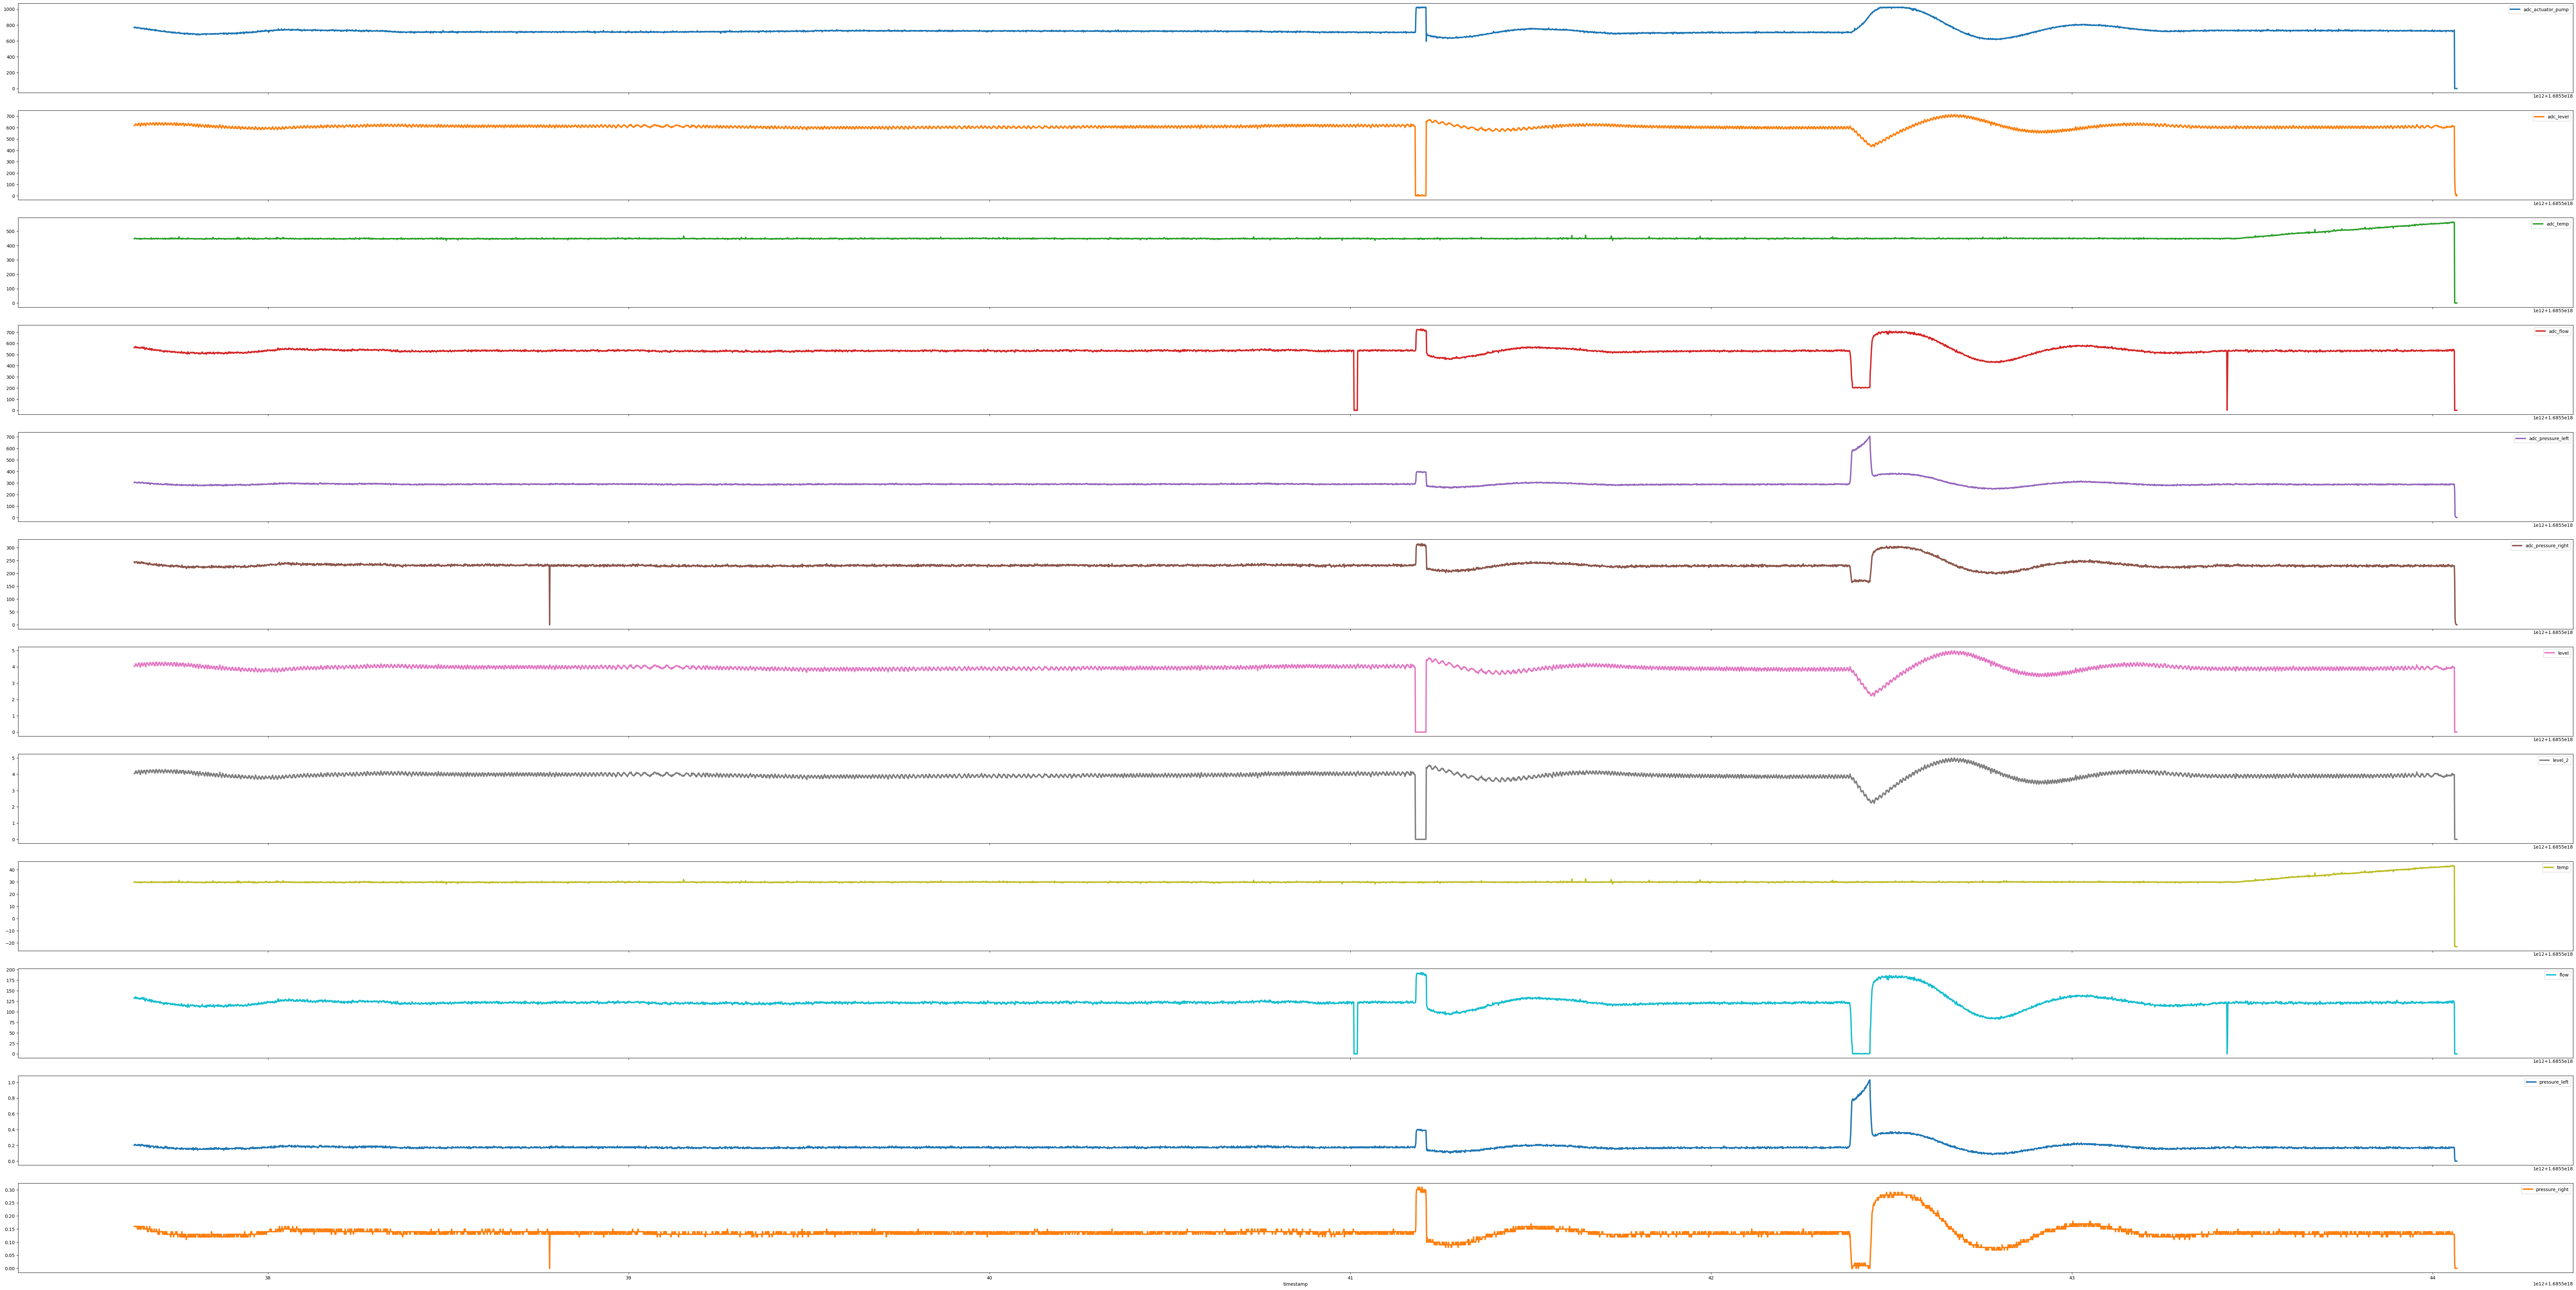

In [ ]:
df[800:].plot(subplots=True, figsize=(100,50), linewidth=3)

In [ ]:
df = df[800:7200]

<p>Attack 1 = 1685538780000000000 - 1685538785000000000 (Pressure R dicabut dan sensor)</p>

<p>Attack 2 = 1685541010000000000 - 1685541025000000000 (Flow dicabut)</p>

<p>Attack 3 = 1685541180000000000 - 1685541220000000000 (Level sensor dicabut)</p>

<p>Attack 4 = 1685542380000000000 - 1685542450000000000 (Manual valve ditutup)</p>

<p>Attack 5 = 1685543400000000000 - Akhir (Water Heater nyala)</p>

<p>Attack 6 = 1685543432000000000 - 1685543437000000000 (Flow dicabut)</p>

In [ ]:
df["Class"] = "Normal"

In [ ]:
df.loc[1685538780000000000:1685538785000000000, "Class"] = "Attack"
# df.loc[1685538790000000000:1685538803000000000, "Class"] = "Attack"
df.loc[1685541010000000000:1685541025000000000, "Class"] = "Attack"
df.loc[1685541180000000000:1685541220000000000, "Class"] = "Attack"
df.loc[1685542380000000000:1685542450000000000, "Class"] = "Attack"
df.loc[1685543400000000000:, "Class"] = "Attack"

In [ ]:
df.head()

,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,level_2,temp,flow,pressure_left,pressure_right,Class
timestamp,,,,,,,,,,,,,
1685537629472508000,768.0,618.0,447.0,562.0,303.0,245.0,4.03,4.04,29.60,131.71,0.20,0.16,Normal
1685537630478802600,773.0,618.0,449.0,567.0,308.0,241.0,4.03,4.04,29.83,133.55,0.21,0.16,Normal
1685537631480057200,767.0,619.0,451.0,569.0,307.0,242.0,4.04,4.05,30.07,134.28,0.21,0.16,Normal
1685537632480058600,772.0,627.0,448.0,566.0,306.0,243.0,4.12,4.13,29.71,133.18,0.21,0.16,Normal
1685537633470162000,770.0,633.0,449.0,572.0,306.0,244.0,4.18,4.19,29.83,135.38,0.21,0.16,Normal


adc_actuator_pump


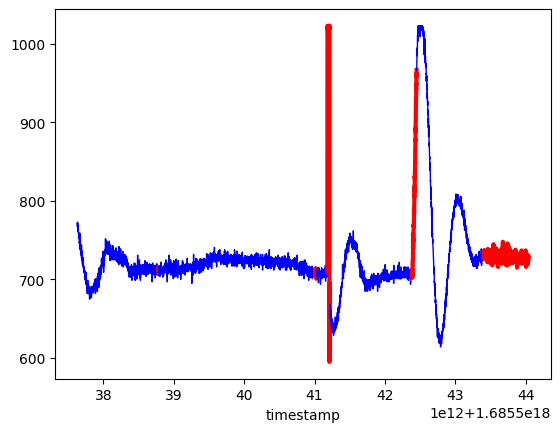

adc_level


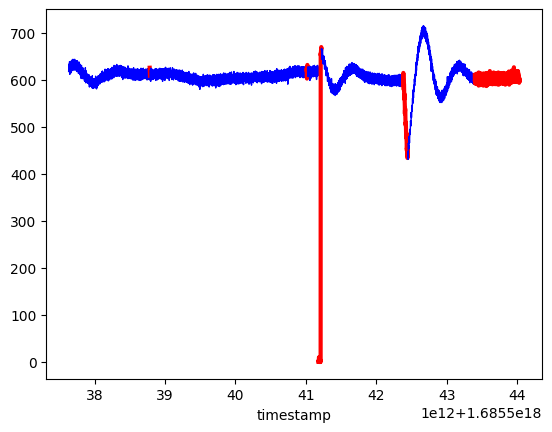

adc_temp


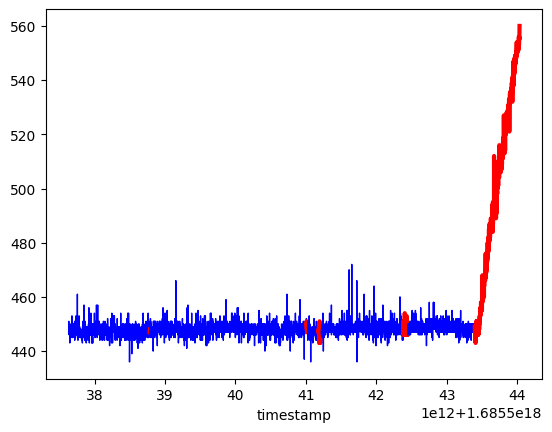

adc_flow


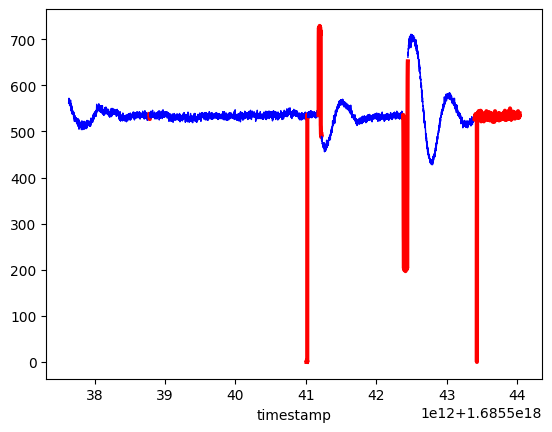

adc_pressure_left


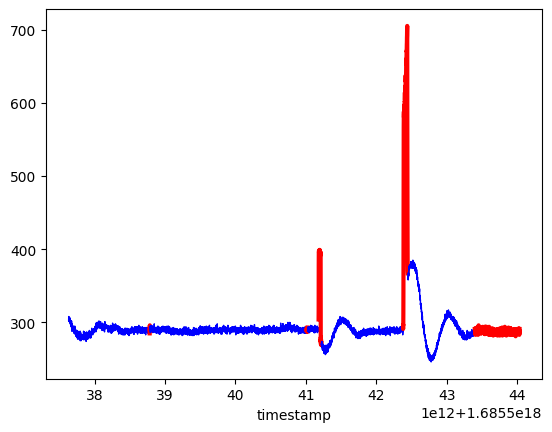

adc_pressure_right


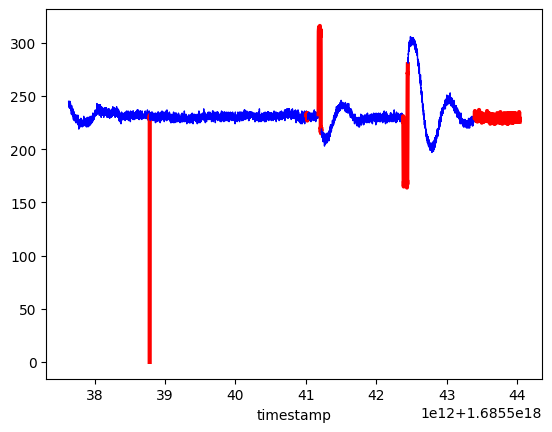

In [ ]:

for column in ["adc_actuator_pump","adc_level","adc_temp","adc_flow","adc_pressure_left","adc_pressure_right"]:
    print(column)
    plt.figure()
    is_attack_period = False
    start_normal = df.index[0]
    i = 0
    for index, row in df.iterrows():
        if (not is_attack_period and row["Class"] == 'Attack'):
            df.loc[start_normal:df.index[i-1], column].plot(color='blue', linewidth=1)
            start_attack = index
            is_attack_period = True

        if (is_attack_period and row["Class"] == 'Normal'):
            df.loc[start_attack:df.index[i-1], column].plot(color='red', linewidth=3)
            start_normal = index
            is_attack_period = False

        i += 1

    if (not is_attack_period):
        df.loc[start_normal:df.index[len(df)-1], column].plot(color='blue', linewidth=1)
        start_attack = index
        is_attack_period = True

    if (is_attack_period):
        df.loc[start_attack:df.index[len(df)-1], column].plot(color='red', linewidth=3)
        start_normal = index
        is_attack_period = False
    
    plt.show()

In [ ]:
# df.to_csv("../../dataset/pompa-attack-3.csv")

In [ ]:
# df = pd.read_csv("../../dataset/smooth_attack.csv")

In [ ]:
# df.head()

,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right
0,676.02,157.78,371.64,474.38,298.52,237.42
1,682.80,158.57,372.75,479.25,300.41,238.98
2,689.27,159.38,373.81,483.90,302.31,240.40
3,695.57,160.43,374.87,488.47,304.17,241.81
4,701.57,161.50,375.87,492.83,305.85,243.13


In [ ]:
# len(df)

40235

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

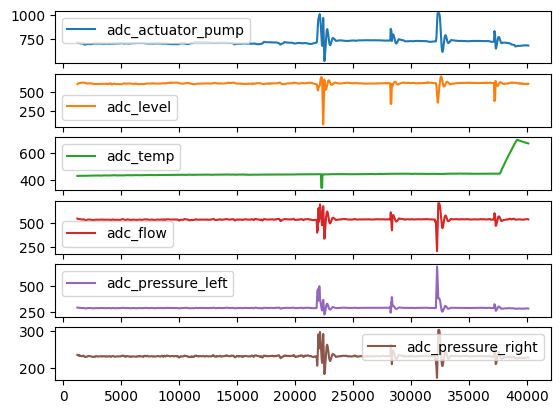

In [ ]:
# df[1200:40100].plot(subplots=True)

In [ ]:
# df = df[["adc_level","adc_temp","adc_flow","adc_pressure_left","adc_pressure_right"]]
# df = df[1200:40100]
# df["Class"] = "TBD"
# df.to_csv("../../dataset/pompa-smooth-attack.csv", index=False)